# 6. Edge detection – Sobel filter

In [11]:
import cv2
import numpy as np
import os

from matplotlib import pyplot as plt

def show_image(image, title="", cmap=""):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap="gray", vmin=0)
    plt.axis('off')
    plt.show()

### **a)** Calculate the first derivatives of the image in $x$ and $y$ directions, using the `Sobel()` function;

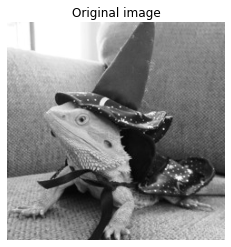

In [12]:
image  = cv2.imread("Images/lizard.bmp", 0)

show_image(image, title="Original image")

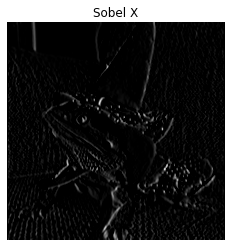

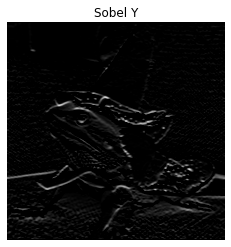

In [23]:
sobel_x = cv2.Sobel(image, cv2.CV_16S, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_16S, 0, 1, ksize=3)

show_image(sobel_x, title="Sobel X")
show_image(sobel_y, title="Sobel Y")

### **b)** Calculate the approximate value of the gradient by combining the directional derivatives

In [24]:
abs_sobel_x = cv2.convertScaleAbs(sobel_x)
abs_sobel_y = cv2.convertScaleAbs(sobel_y)

gradient = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

### **c)** Show the "gradient image"

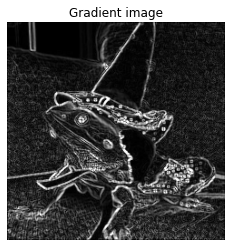

In [25]:
show_image(gradient, title="Gradient image")

### **d)** Show the result of thresholding the "gradient image"

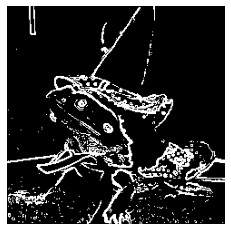

In [26]:
window_name = "Gradient"    

cv2.namedWindow(window_name)
dst = gradient

def threshold(value):
    threshold_value = cv2.getTrackbarPos("Value", window_name)

    global dst
    _, dst = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_BINARY)

    cv2.imshow(window_name, dst)
    
cv2.createTrackbar("Value", window_name, 0, 255, threshold)

cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(dst, "gray")
plt.axis('off')
plt.show()